In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
import pickle
import joblib
from sklearn.metrics import roc_curve, auc

In [7]:
# Function to handle class imbalance
def handle_class_imbalance(y):
    count_class_0, count_class_1 = np.bincount(y)
    scale_pos_weight = count_class_0 / count_class_1
    return scale_pos_weight

In [8]:
# Importing Dataset
data = pd.read_csv("D:\POLTEKSSN/TINGKAT 3/Rekayasa Sosial/Chrome-Extension-Phishing/back-end/phishing.csv")
data.head()
data.shape
print("The columns in the dataset are: ", data.columns)
data.info()
data.nunique()  # Returns the number of unique values in the respective feature

The columns in the dataset are:  Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [11]:
# Description of dataset
data.describe().T

count      mean       std  min  25%  50%  75%  max
UsingIP              11054.0  0.313914  0.949495 -1.0 -1.0  1.0  1.0  1.0
LongURL              11054.0 -0.633345  0.765973 -1.0 -1.0 -1.0 -1.0  1.0
ShortURL             11054.0  0.738737  0.674024 -1.0  1.0  1.0  1.0  1.0
Symbol@              11054.0  0.700561  0.713625 -1.0  1.0  1.0  1.0  1.0
Redirecting//        11054.0  0.741632  0.670837 -1.0  1.0  1.0  1.0  1.0
PrefixSuffix-        11054.0 -0.734938  0.678165 -1.0 -1.0 -1.0 -1.0  1.0
SubDomains           11054.0  0.064049  0.817492 -1.0 -1.0  0.0  1.0  1.0
HTTPS                11054.0  0.251040  0.911856 -1.0 -1.0  1.0  1.0  1.0
DomainRegLen         11054.0 -0.336711  0.941651 -1.0 -1.0 -1.0  1.0  1.0
Favicon              11054.0  0.628551  0.777804 -1.0  1.0  1.0  1.0  1.0
NonStdPort           11054.0  0.728243  0.685350 -1.0  1.0  1.0  1.0  1.0
HTTPSDomainURL       11054.0  0.675231  0.737640 -1.0  1.0  1.0  1.0  1.0
RequestURL           11054.0  0.186720  0.982458 -1.0 -1.0  1.0  1.0  1.0
AnchorURL            11054.0 -0.076443  0.715116 -1.0 -1.0  0.0  0.0  1.0
LinksInScriptTags    11054.0 -0.118238  0.763933 -1.0 -1.0  0.0  0.0  1.0
ServerFormHandler    11054.0 -0.595712  0.759168 -1.0 -1.0 -1.0 -1.0  1.0
InfoEmail            11054.0  0.635788  0.771899 -1.0  1.0  1.0  1.0  1.0
AbnormalURL          11054.0  0.705446  0.708796 -1.0  1.0  1.0  1.0  1.0
WebsiteForwarding    11054.0  0.115705  0.319885  0.0  0.0  0.0  0.0  1.0
StatusBarCust        11054.0  0.762077  0.647516 -1.0  1.0  1.0  1.0  1.0
DisableRightClick    11054.0  0.913877  0.406009 -1.0  1.0  1.0  1.0  1.0
UsingPopupWindow     11054.0  0.613353  0.789845 -1.0  1.0  1.0  1.0  1.0
IframeRedirection    11054.0  0.816899  0.576807 -1.0  1.0  1.0  1.0  1.0
AgeofDomain          11054.0  0.061335  0.998162 -1.0 -1.0  1.0  1.0  1.0
DNSRecording         11054.0  0.377239  0.926158 -1.0 -1.0  1.0  1.0  1.0
WebsiteTraffic       11054.0  0.287407  0.827680 -1.0  0.0  1.0  1.0  1.0
PageRank             11054.0 -0.483626  0.875314 -1.0 -1.0 -1.0  1.0  1.0
GoogleIndex          11054.0  0.721549  0.692395 -1.0  1.0  1.0  1.0  1.0
LinksPointingToPage  11054.0  0.343948  0.569936 -1.0  0.0  0.0  1.0  1.0
StatsReport          11054.0  0.719739  0.694276 -1.0  1.0  1.0  1.0  1.0
class                11054.0  0.113986  0.993527 -1.0 -1.0  1.0  1.0  1.0

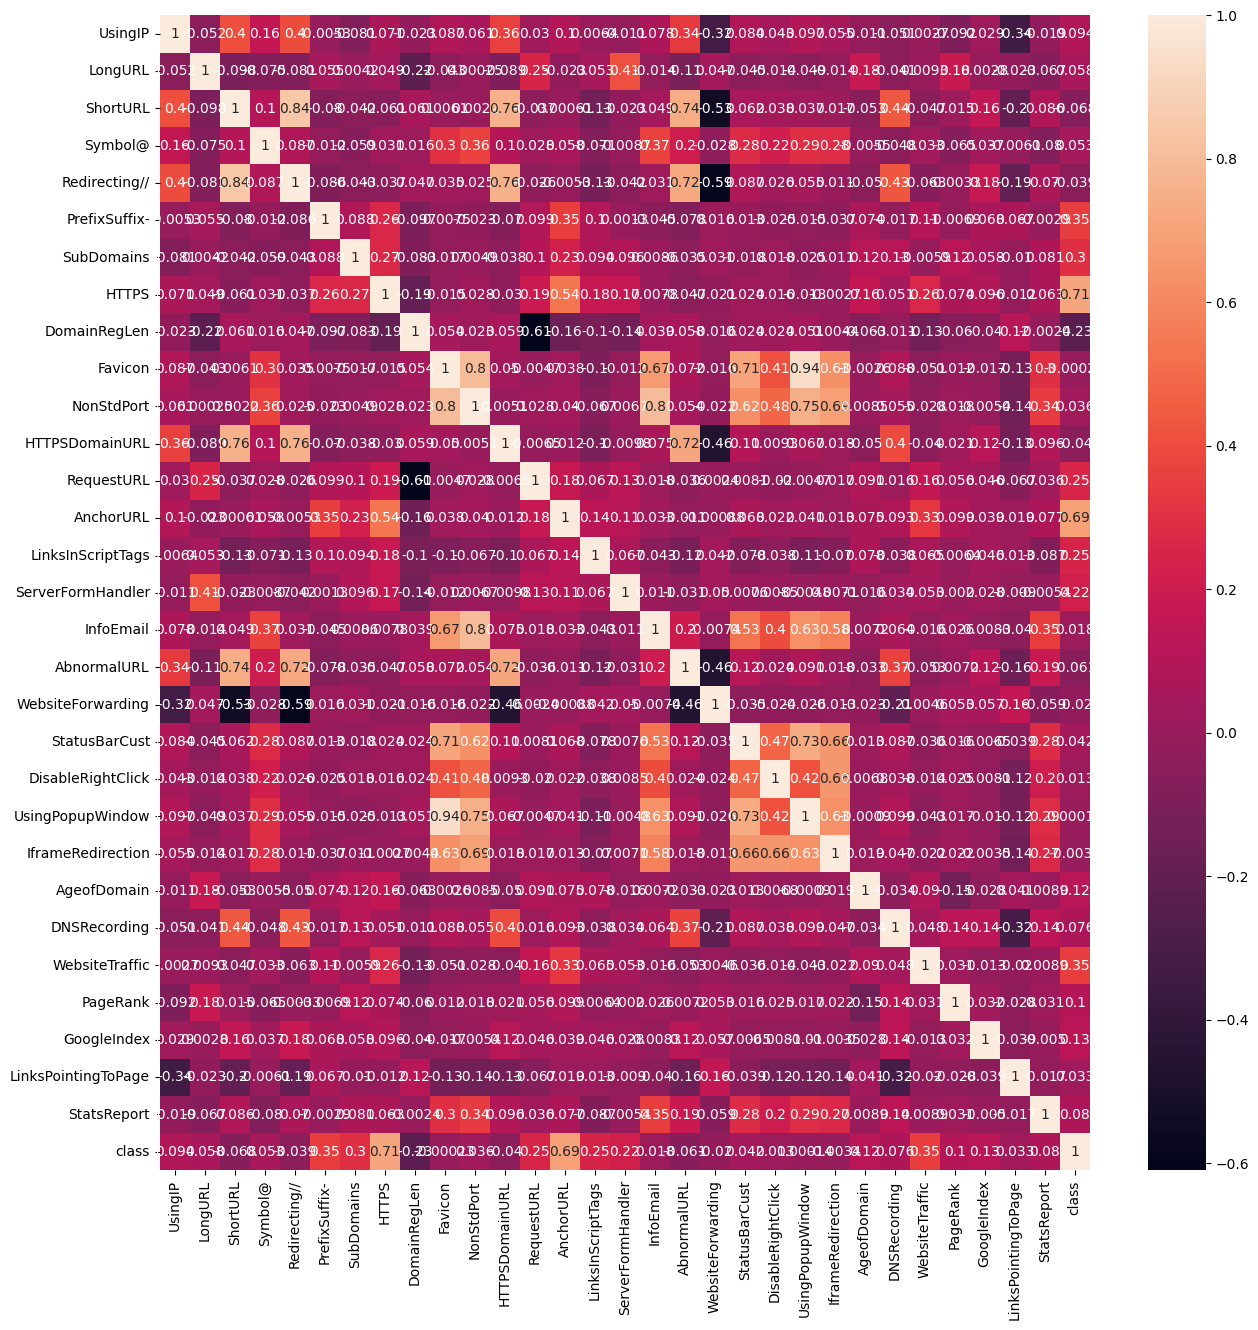

In [12]:
# Heatmap of correlations
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

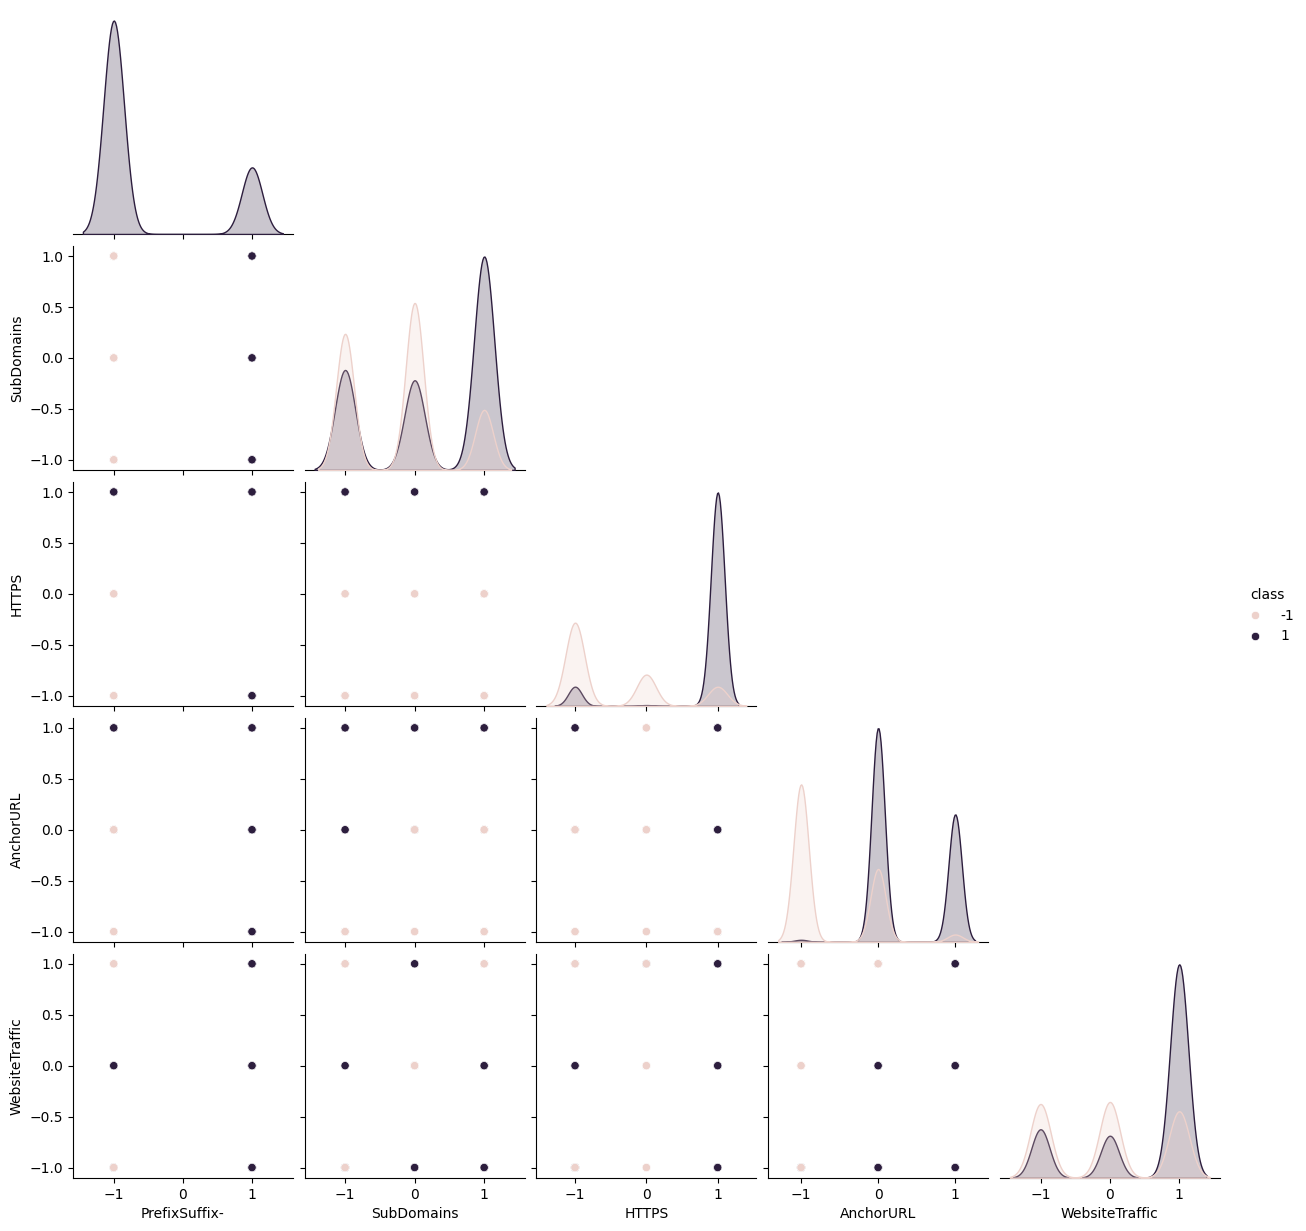

In [13]:
# Pairplot for particular features
df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data=df, hue="class", corner=True);

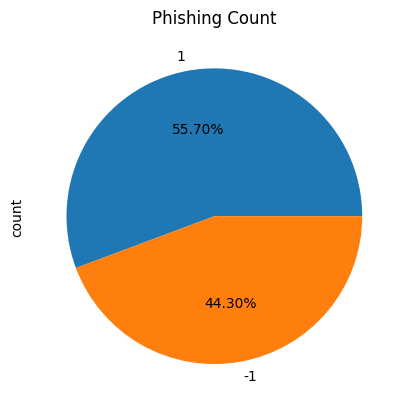

In [14]:
# Phishing Count in pie chart
data['class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [15]:
# Splitting the dataset into dependent and independent features
X = data.drop(["class"], axis=1)
y = data["class"]

# Convert -1 to 0 for class labels
y[y == -1] = 0

In [16]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [17]:
# Handling class imbalance
scale_pos_weight = handle_class_imbalance(y_train)

In [18]:
# Model Training - XGBoost with tuned parameters
xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    colsample_bytree=0.8,
    subsample=0.8,
    scale_pos_weight=scale_pos_weight,
    early_stopping_rounds=10,
    eval_metric='auc'
)

In [19]:
# Fit the model with early stopping
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-auc:0.95030
[1]	validation_0-auc:0.95606
[2]	validation_0-auc:0.97977
[3]	validation_0-auc:0.98393
[4]	validation_0-auc:0.98584
[5]	validation_0-auc:0.98645
[6]	validation_0-auc:0.98633
[7]	validation_0-auc:0.98682
[8]	validation_0-auc:0.98663
[9]	validation_0-auc:0.98661
[10]	validation_0-auc:0.98659
[11]	validation_0-auc:0.98706
[12]	validation_0-auc:0.98710
[13]	validation_0-auc:0.98686
[14]	validation_0-auc:0.98682
[15]	validation_0-auc:0.98697
[16]	validation_0-auc:0.98692
[17]	validation_0-auc:0.98698
[18]	validation_0-auc:0.98722
[19]	validation_0-auc:0.98727
[20]	validation_0-auc:0.98728
[21]	validation_0-auc:0.98724
[22]	validation_0-auc:0.98727
[23]	validation_0-auc:0.98734
[24]	validation_0-auc:0.98751
[25]	validation_0-auc:0.98771
[26]	validation_0-auc:0.98768
[27]	validation_0-auc:0.98770
[28]	validation_0-auc:0.98785
[29]	validation_0-auc:0.98774
[30]	validation_0-auc:0.98786
[31]	validation_0-auc:0.98794
[32]	validation_0-auc:0.98800
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [21]:
# Computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier: Accuracy on training Data: %.3f" % acc_train_xgb)
print("XGBoost Classifier: Accuracy on test Data: %.3f" % acc_test_xgb)
print()

f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb)
print("XGBoost Classifier: f1_score on training Data: %.3f" % f1_score_train_xgb)
print("XGBoost Classifier: f1_score on test Data: %.3f" % f1_score_test_xgb)
print()

recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb)
print("XGBoost Classifier: Recall on training Data: %.3f" % recall_score_train_xgb)
print("XGBoost Classifier: Recall on test Data: %.3f" % recall_score_test_xgb)
print()

precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb)
print("XGBoost Classifier: precision on training Data: %.3f" % precision_score_train_xgb)
print("XGBoost Classifier: precision on test Data: %.3f" % precision_score_test_xgb)

XGBoost Classifier: Accuracy on training Data: 0.977
XGBoost Classifier: Accuracy on test Data: 0.966

XGBoost Classifier: f1_score on training Data: 0.979
XGBoost Classifier: f1_score on test Data: 0.970

XGBoost Classifier: Recall on training Data: 0.978
XGBoost Classifier: Recall on test Data: 0.972

XGBoost Classifier: precision on training Data: 0.980
XGBoost Classifier: precision on test Data: 0.968


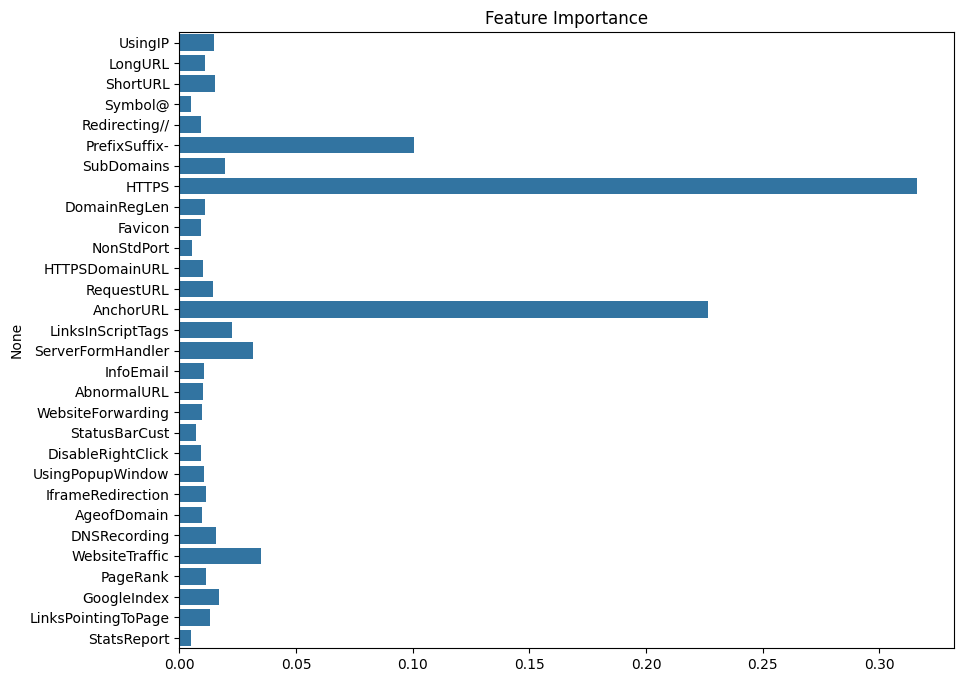

In [22]:
# Plotting feature importance
plt.figure(figsize=(10,8))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.show()

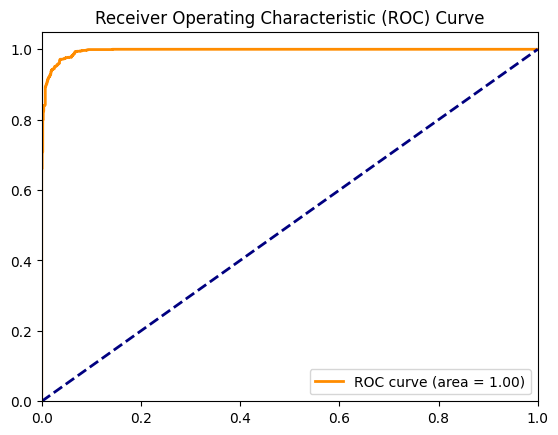

In [23]:
# Plotting ROC curve
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Making specific predictions
print(xgb.predict([[1,-1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,0,-1,1,-1,1,-1,-1,1,-1,1,-1,-1]]))
print(xgb.predict([[1,1,1,1,1,1,-1,1,-1,1,1,1,1,1,-1,1,-1,-1,0,1,1,1,1,1,-1,1,-1,-1,1,-1]]))
print(xgb.predict([[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,-1,1,-1]]))

[0]
[1]
[0]


In [26]:
# Saving the model
xgb.save_model('MyClassifier.model')
pickle.dump(xgb, open('XgClassifierModel.pickle', 'wb'))
filename = "XgClassifier.joblib"
joblib.dump(xgb, filename)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:24:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


['XgClassifier.joblib']